In [1]:
# Import libraries


import pandas as pd

nydf = pd.read_csv (r'C:\Users\giorg\OneDrive\Υπολογιστής\MSc_Data_Science_&_CI\Machine Learning\Coursework\Dataset\AB_NYC_2019.csv')


In [2]:
##############################################################################################################
#>>>>>>>>>>                                     Data Exploration                                   <<<<<<<<<<#
##############################################################################################################

In [3]:
pd.options.display.max_columns=30

In [4]:
nydf.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [5]:
nydf.shape

(48895, 16)

In [6]:
#we can get the missing values (if a column doesn't have 48895 entires means that has missing values)

nydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# any entry with 'True' is a missing value

nydf.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [8]:
nydf_missing = nydf.isna()

In [9]:
#Percentage of missing values in each column

nydf_missing.mean().round(4) * 100

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [10]:
##############################################################################################################
#>>>>>>>>>>                                     Data Cleaning                                      <<<<<<<<<<#
##############################################################################################################

In [11]:
# according to the dataset the Rooms with 0 'number_of_reviews' had as null the columns 'last_review' & 'review_per_month'
# so I replaced them as also 0, because we might need them in our analysis

nydf['last_review']=nydf['last_review'].fillna(0)
nydf['reviews_per_month']=nydf['reviews_per_month'].fillna(0)


In [12]:
nydf_missing = nydf.isna()

In [13]:
# only a small percentage of null values exists in 'name' and in 'host_name'

nydf_missing.mean().round(4) * 100

id                                0.00
name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       0.00
reviews_per_month                 0.00
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [14]:
#replacing the 'name' column according to what actually is

nydf.rename(columns={'name': 'room info'}, inplace=True)

In [15]:
nydf.head(3)

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365


In [16]:
#I used Excell to filter the rows with the blanks names so as to check if we can find another another entry with the same 'host_id'
#so as to replace the blank names but it seems that there is no way we can replace the missing values in 'host_name'

nydf[nydf.host_id == 228750026]

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38992,30468335,LARGE Prospect Lefferts Gardens Bedroom,228750026,NaN,Brooklyn,Flatbush,40.65152,-73.95271,Private room,55,7,0,0,0.0,1,69


In [17]:
# No duplicates in our dataset

nydf.duplicated().sum()


0

In [18]:
#Consider the 0 in price as outliers and drop them

nydf.drop(nydf[nydf['price']==0].index, inplace=True)

In [19]:
##############################################################################################################
#>>>>>>>>>>                          Encoding Categorical Values                                   <<<<<<<<<<#
##############################################################################################################

In [20]:
#In order to flag 'room type' and 'neighbourhood' into numbers to use for regression I had to change the type into category

cols = ['room_type', 'neighbourhood_group']
nydf[cols] = nydf[cols].astype('category')

In [21]:
# Entire home = 0, private room = 1, shared room = 2

nydf["room_type"] = nydf["room_type"].cat.codes
nydf.head(5)

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,19/11/2018,0.10,1,0


In [22]:
# Bronx = 0, Brooklyn = 1, Manhatan = 2, Queens = 3, Staten Island = 4

nydf["neighbourhood_group"] = nydf["neighbourhood_group"].cat.codes
nydf.head()

,id,room info,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,Midtown,40.75362,-73.98377,0,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,Harlem,40.80902,-73.94190,1,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,East Harlem,40.79851,-73.94399,0,80,10,9,19/11/2018,0.10,1,0


In [23]:
nydf.isnull().sum()

id                                 0
room info                         16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [24]:
nydf.shape

(48884, 16)

In [25]:
# I will just drop the null values

nydf = nydf.dropna()

In [26]:
nydf.isnull().sum()

id                                0
room info                         0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [27]:
##############################################################################################################
#>>>>>>>>>>                                     Data Insights                                      <<<<<<<<<<#
##############################################################################################################

Index(['id', 'room info', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

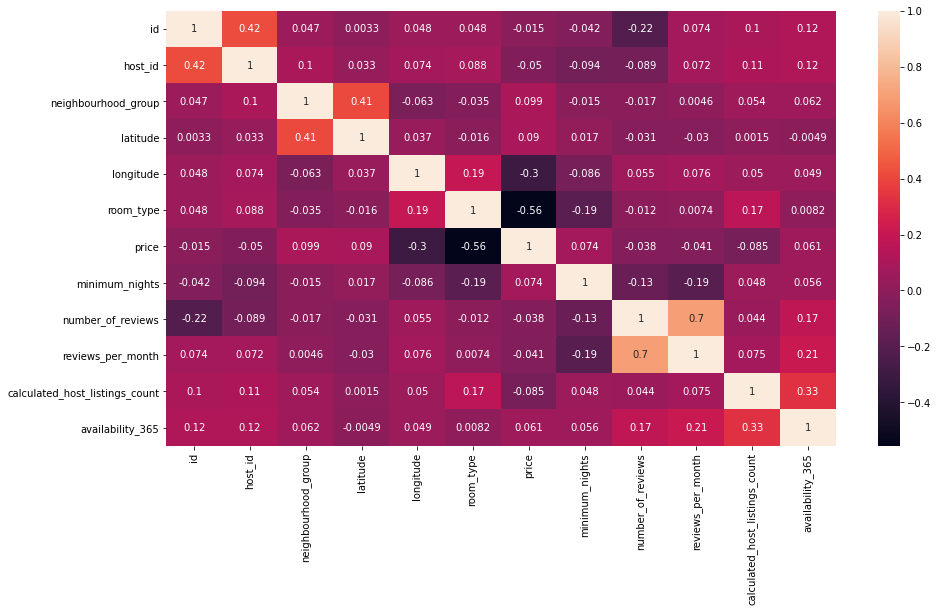

In [28]:
# Correlation between variables

import matplotlib.pyplot as plt
import seaborn as sns

corr = nydf.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
nydf.columns

Text(0.5, 1.0, 'Room type')

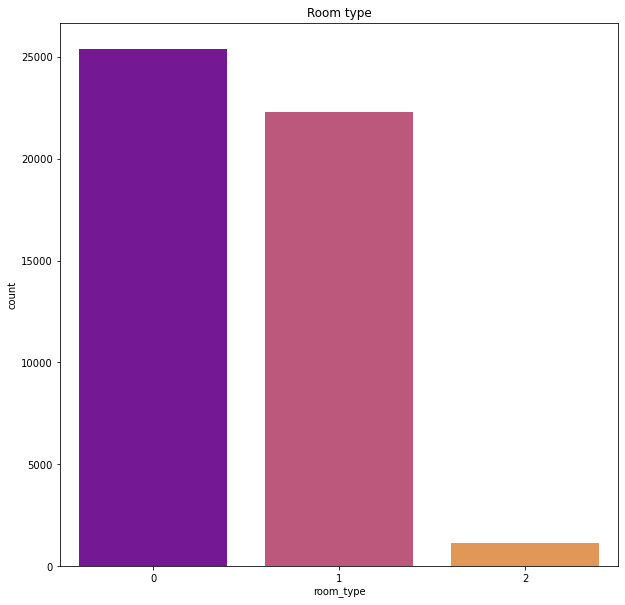

In [29]:
# Distribution of room type

sns.countplot(nydf['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room type')

Text(0.5, 1.0, 'Neighborhood group')

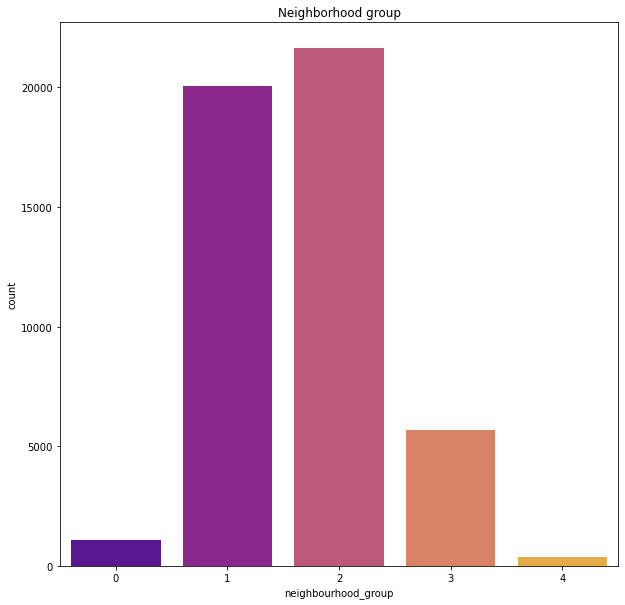

In [30]:
# Distribution of neighborhood group

sns.countplot(nydf['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighborhood group')

In [31]:
###################################################################################################################
#>>>>>          Predicting Models (LinearRegression,DecissionTreeRegressor,RandomForestRegressor,XGBoost )   <<<<<#
###################################################################################################################

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


In [33]:
#
#?

nydf['price'] = np.log(nydf.price+1)
nydf['availability_365'] = np.log(nydf.availability_365+1)

In [65]:
###################
#Splitting my data#
###################

X = nydf[['neighbourhood_group','latitude','longitude',
          'room_type','minimum_nights','number_of_reviews','reviews_per_month',
          'calculated_host_listings_count','availability_365']]
y = nydf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
###################
#Linear Regression#
###################

lr = LinearRegression()
lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

r2 = r2_score(y_test,lr_pred)*100
MAE = mean_absolute_error(y_test,lr_pred)*100
MSE = metrics.mean_squared_error(y_test, lr_pred)*100

print('R-Square Score:',r2)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error :',MSE)

R-Square Score: 44.77732590074995
Mean Absolute Error: 36.96326842311028
Mean Squared Error : 26.405101660888004


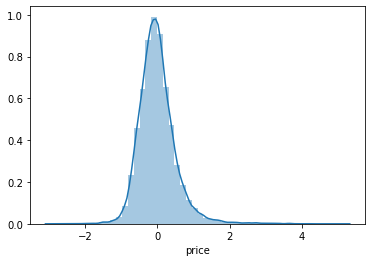

In [58]:
sns.distplot(y_test-lr_pred)

In [38]:
################
#Decission Tree#
################

dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)

r2 = r2_score(y_test,dtree_pred)*100
MAE = mean_absolute_error(y_test,dtree_pred)*100
MSE = metrics.mean_squared_error(y_test, dtree_pred)*100

print('R-Square Score:',r2)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error :',MSE)

R-Square Score: 19.695962156013692
Mean Absolute Error: 43.27022981795787
Mean Squared Error : 38.397928344419896


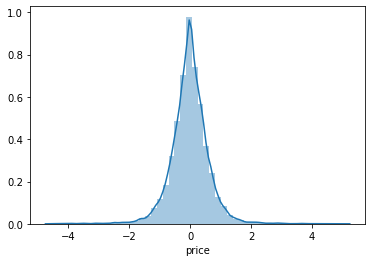

In [39]:
sns.distplot(y_test-dtree_pred)

In [40]:
################
#Random Forrest#
################

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

rf_pred = random_forest_regressor.predict(X_test)

r2 = r2_score(y_test,rf_pred)*100
MAE = mean_absolute_error(y_test,rf_pred)*100
MSE = metrics.mean_squared_error(y_test, rf_pred)*100

print('R-Square Score:',r2)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error :',MSE)

R-Square Score: 57.95570437715165
Mean Absolute Error: 31.60231473808964
Mean Squared Error : 20.103769299299763


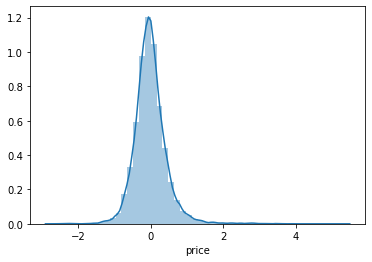

In [41]:
sns.distplot(y_test-rf_pred)

In [43]:
#########
#XGBoost#
#########

xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, y_train)

xgb_pred = xg_boost.predict(X_test)

r2 = r2_score(y_test,xgb_pred)*100
MAE = mean_absolute_error(y_test,xgb_pred)*100
MSE = metrics.mean_squared_error(y_test, xgb_pred)*100

print('R-Square Score:',r2)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error :',MSE)

R-Square Score: 59.41101345891552
Mean Absolute Error: 31.286783565638753
Mean Squared Error : 19.407903246472916


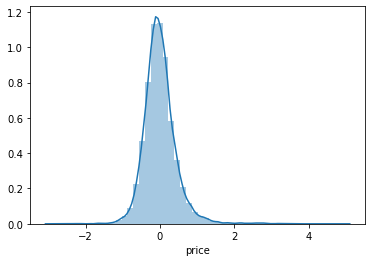

In [44]:
sns.distplot(y_test-xgb_pred)

In [45]:
##############################################################################################################
#>>>>>>>>>>                                 Clustering                                             <<<<<<<<<<#
##############################################################################################################

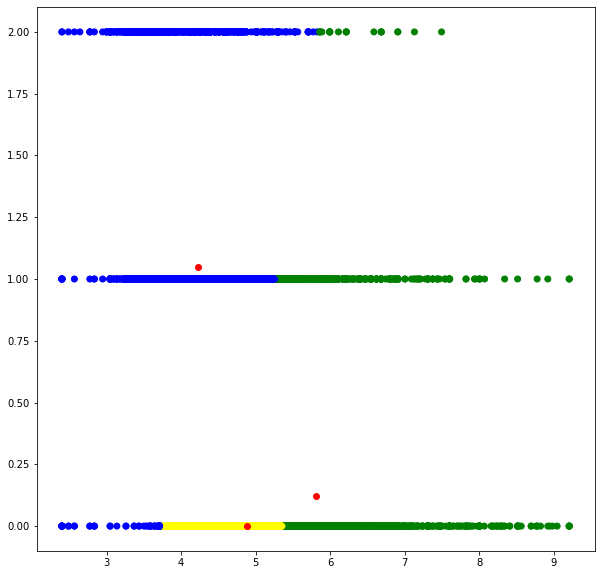

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data = np.array(list(nydf[['price','room_type']].apply(tuple, axis=1)))
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

kmeans.labels_
kmeans.cluster_centers_

fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(1, 1, 1)
colorlist = ['blue', 'yellow', 'green','orange','black','purple','gold','pink','cyan']
color = list(map(lambda x: colorlist[x], kmeans.labels_ ))
ax.scatter(data[:,0],data[:,1], c = color)

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',)


fig.canvas.draw()

In [47]:
###############
#PCA Technique#
###############

In [48]:
from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [49]:
scaled_data=scaler.transform(X_train)
scaled_data_test=scaler.transform(X_test)

In [50]:
scaled_data


array([[-0.9035028 , -0.30221642, -0.17280783, ..., -0.53184943,
        -0.18446111, -1.22033556],
       [ 0.45064258, -0.02838485, -0.63065593, ..., -0.04368208,
        -0.18446111, -1.22033556],
       [ 0.45064258,  1.05778316, -0.36840404, ...,  0.38667599,
        -0.18446111, -1.22033556],
       ...,
       [ 1.80478796,  0.56873281,  0.76190162, ..., -0.59608198,
        -0.18446111, -0.32515191],
       [-0.9035028 , -0.24561845, -0.18133102, ...,  1.06754098,
        -0.15430138,  1.01762357],
       [ 0.45064258,  1.51184901, -0.15029788, ..., -0.15930066,
        -0.15430138,  0.80160495]])

In [51]:
from sklearn.decomposition import PCA

pca=PCA(n_components=8)

In [52]:
pca.fit(scaled_data)
pca.fit(scaled_data_test)

PCA(n_components=8)

In [53]:
X_pca=pca.transform(scaled_data)
X_pca_test=pca.transform(scaled_data_test)